# 22.bit全探索

### ABC221 C Dif:379
url : https://atcoder.jp/contests/abc221/tasks/abc221_c

### [概要]
bit全探索は2進数の「0」「1」を二択に割り当てて全探索を行う方法。C、D問題あたりで出題されることが多い。  
考え方は簡単だが実装でシフト演算、アンド演算が必要となり、難易度はそれなりに高い。  
【実装のコツ】をしっかり読んで自力でコードを書けるようになるまで練習しよう。

### [解説]
Nの各桁をグループAとグループBに振り分け、数字を大きい順につなげて掛け算を行う。  
グループへの振り分けは2^10通り未満になるから、すべての場合を試しても実行制限時間に間に合う。  
グループへの振り分けはbit全探索で行う。  
「bit全探索」  
2進数で作った数の各桁0,1を「取る/取らない」等の二択に振り分け、すべての場合を列挙する方法。  
解説動画は以下の通りである。  
【ゆっくり解説】bit全探索 ABC182 C【競技プログラミング】   https://www.youtube.com/watch?v=umfbbrElhaM  

各桁に0,1を割り当てて  
「0」→グループA  
「1」→グループB  
というように振り分ける。  

~例~
N : 123456  

まず同じ桁数の2進数を作る。  
例えば2進数が  
100101  
の場合  
「右から」1,3,4桁目→「0」
「右から」0,2,5桁目→「1」
となっているから、以下のように振り分けられる。  
左から0文字目=「1」→1→グループB  
左から1文字目=「2」→0→グループA  
左から2文字目=「3」→1→グループB  
左から3文字目=「4」→0→グループA  
左から4文字目=「5」→0→グループA  
左から5文字目=「6」→1→グループB  
2進数は100101は右から0桁目、1桁目、...  
N(=123456)は左から0文字目、1文字目、...  
と数えることに注意しよう。考えるときはややこしいが実装はしやすい。

グループAは[2,4,5] グループBは[1,3,6] となっている。  
それぞれのグループ内の数を大きい順に並べることで掛け算が最も大きい値となる。  
並び替えて以下のように計算する。 542*631=342002 このように2進数を割り振れば対応する掛け算の値を確認できる。  
あとは2進数を(000000),(000001),(000010),(000011),...,(111111)と全パターン試せばよいだけ。
ただし(000000)や(111111)は片方のグループが空になる。  
その場合は無視する。 また、Nの数値によってはグループのどちらかが「0」のみになってしまうこともあるが、それは単に掛け算の結果が0になるだけなので問題ない。 
### [実装のコツ]
- bit全探査
  まず(000...0)~(111...1)とNの桁数に対応する2進数を作る必要がある。  
  例えばNが6桁なら(000000)~(111111)=0~63(=2^(Nの桁数)-1)となる。  
  2進数をbitnumとしてそのまま for bitnum in range(2**(len(N))): としても解ける。が、ちょっとわかりづらい。
  シフト演算を使うことでより直感的に範囲を指定することができる。  
  シフト演算はある数を2進数と見て指定の桁数だけ左右に移動する演算。  
  例えば5(2進数で「101」)を左に2つシフト演算すると以下のようになる  
  5<<2  
  ⇔(101)<<2  
  ⇔(10100)(左に2つ移動し、空いた2つ分「0」が追加された)  
  ⇔20  
  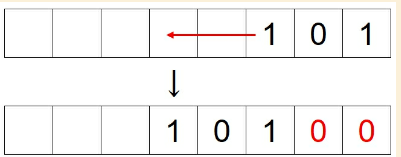  
  pythonでは **左シフト=「<<」**  **右シフト=「>>」** と書く。  
  pythonで以下を実装してみよう。「20」が出力される。  
```
print(5<<2)
```
  シフト演算を使って2進数の範囲を指定するなら以下のようになる。
```
for bitnum in range(1<<len(N))
```
  これは1<<(Nの桁数)だから、例えばNが6桁の場合は  
  1<<6  
  ⇔(1000000)
  ⇔64
  よってbitnum=0~63(000000)~(111111)の範囲で2進数を作ることができる。  
  つまり(Nの桁数)分左にシフト演算すればちょうどよく2進数を作れる。  
  「桁ごとに0か1か確認」 2進数が作れたら次は各桁の数が0か1かを確認する。  
  これは右シフト演算とアンド演算を使う。 アンド演算は2進数として各桁を見た時、両方が「1」の時だけ「1」になる演算。  
  pythonでは「&」と書く。(andと書くと意味がかわるので注意)  
  例えば21(2進数で(10101))と7(2進数で(00111))のアンド演算は以下のようになる。  
  21 & 7  
  ⇔(10101) & (00111)  
  ⇔(00101)  
  ⇔5 それぞれの桁を見て両方が1の桁だけ「1」に、それ以外は「0」になる。  
  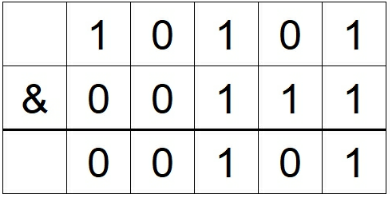  
  pythonで以下を実行してみよう  
```
print(21&7)
```
  各桁が「0」か「1」かは右シフトしてから「1」とアンド演算を行えばわかる。  
  例えばbitnum=43(101011)の時、1桁目が「0」か「1」か確認するには右に1シフト演算してから「1」とアンド演算を行う。  
  まず43(101011)を右に1シフト演算すると以下のようになる。  
  43>>1  
  ⇔(101011)>>1  
  ⇔(010101)(右に1つ移動し、左に空いた1つ分「0」が追加された。右端の「1」は消える)  
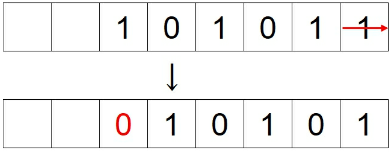  
  さらに(010101)と「1」のアンド演算を行う。  
  (010101) & 1  
  ⇔(010101) & (000001)  
  ⇔(0000001)  
  ⇔1  
  「1」とアンド演算を行うということは  
  右端の桁が「0」→0  
  右端の桁が「1」→1  
  ということである。 つまり確認したい桁を右シフトで右端へ持っていき、「1」とアンド演算を行うことでそれが「0」か「1」かを判定することができる。  
  以上よりbit全探索を行うときのコードは以下のようになる。(2セル下)  

  bitnumが(000000),(000001),(000010),(000011),...,(111111)の2進数。  
  shiftが右シフトする桁数を表す。 一度書けるようになれば他のbit全探索問題もほぼ同じ書き方で解ける。  
  最初は難しく感じるかもしれないが、練習して自力で書けるようになろう。  

- ソート
  リスト.sort() と書くことで小さい順にソートができる。  
  大きい順にするときは  
  リスト.sort(reverse=True)

- リストの要素の結合
  グループA,Bに入れた要素は大きい順にソートした後結合して一つの文字列にする。  
  リストの結合は以下のように書く。 "".join(リスト)  
  トリッキーな書き方だが「リスト 要素 結合」等で検索すればすぐに出てくるのでわざわざ覚える必要はない。


In [3]:
print(5<<2) #5(101)を二回左シフトして、20(10100)
print(21&7) #21(10101)&7(00111)=5(101)

20
5


In [ ]:
# bit全探査
# bitnum=(000...0)~(111...1)まで
for bitnum in range(1<<len(N)):
    #グループA,Bを用意
    A=[]
    B=[]
    #shift=0~(Nの桁数-1)まで
    for shift in range(len(N)):
        #bitnumのshift桁目が「0」か「1」か確認
        #右にshift分シフトして「1」とand演算
        if bitnum >> shift & 1 == 0:
            #グループAへ追加
            A.append(N[shift])
        #1ならば
        else:
            #グループBへ追加
            B.append(N[shift])

In [ ]:
# 入力の受け取り(文字列)
N=input()

# 答え 初期値は0
ans=0

# bitnum=(000000),(000001),(000010),(000011),...,(111111)まで
for bitnum in range(1<<len(N)):
    # グループA,Bを用意
    A=[]
    B=[]

    # shift=0~(Nの桁数-1)まで
    for shift in range(len(N)):
    # bitnumのshift桁目が「0」か「1」か確認
    # 右にshift分シフト演算して「1」とアンド演算
        # 0ならば
        if bitnum>>shift & 1==0:
            # グループAへ追加
            A.append(N[shift])
        # 1ならば
        else:
            # グループBへ追加
            B.append(N[shift])

    # グループAまたはグループBが空なら
    if A==[] or B==[]:
        # 次のbitnum
        continue

    # 大きい順に並び替え
    A.sort(reverse=True)
    B.sort(reverse=True)

    # A,Bを結合
    A_join="".join(A)
    B_join="".join(B)

    # 整数にして掛け算
    tmp_ans=int(A_join)*int(B_join)

    # ansよりtmp_ansが大きかったらansを更新
    ans=max(ans,tmp_ans)

# 答えの出力
print(ans)
